# Title

**- A Walkthrough Example**

# Description

The aim of this HW is to let you do some analysis on your own with less structure.

# Dataset Description:
The dataset used here is the Wine data set (another commonly used sklearn dataset).  Use this to answer the questions embedded in the Notebook.

# Instructions:
1. Read the data.  
2. Do some explorations.
3. Fit some multiclass models.
4. Interpret these models.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated β coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">sklearn.KNeighborsClassifier</a> : Fit a k-NN classification model


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
#import sklearn.metrics as met

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

First Read in the data set and take a peak at it:

In [2]:
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'],columns=raw['feature_names'])
y = raw['target']
print(X_full.shape,y.shape)

(178, 13) (178,)


In [3]:
X_full.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Q1**: Perform a 70-30 `train_test_split` using `random_state=109` and `shuffle=True`.  Why is it important to shuffle here?

In [4]:
### your code here
from sklearn.model_selection import train_test_split

# Load dataset
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'], columns=raw['feature_names'])
y = raw['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=109, shuffle=True)

# Check the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(124, 13) (54, 13) (124,) (54,)


**Q2**: Explore the data a little.  Visualize the marginal association (aka, bivariate relationship) of wine type to amount of alcohol, level of malic acid, and total level of phenols.  Which predictor seems to have the strongest association with the response?

ValueError: Could not interpret value `phenols` for `y`. An entry with this name does not appear in `data`.

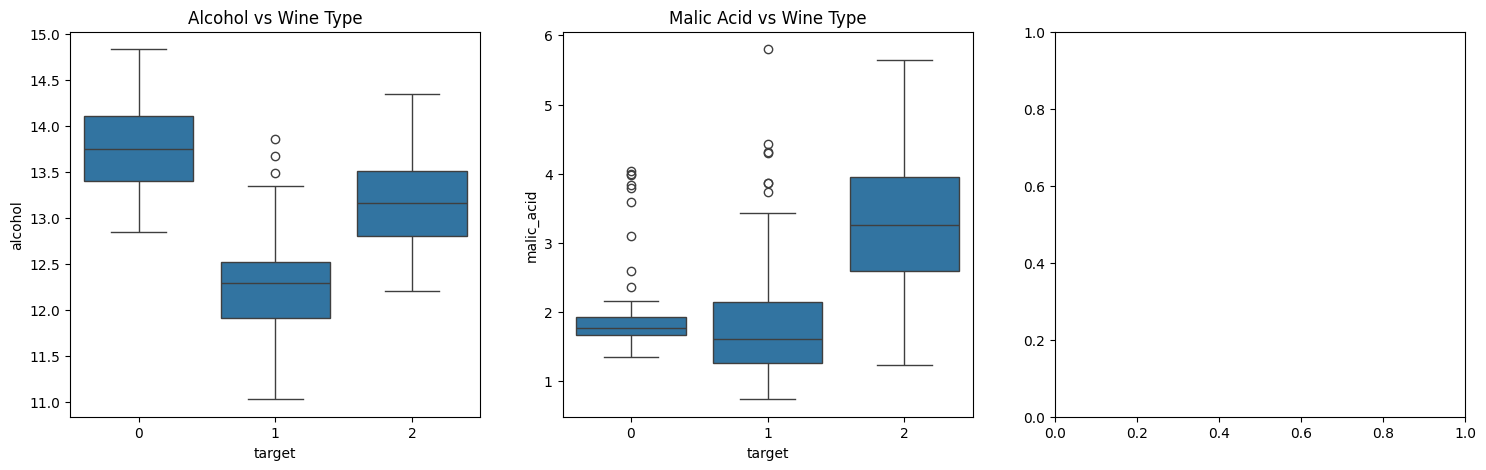

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the wine dataset
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'], columns=raw['feature_names'])
y = raw['target']

# Add the target to the dataframe for easier plotting
X_full['target'] = y

# Plot the relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Alcohol vs Target
sns.boxplot(x='target', y='alcohol', data=X_full, ax=axes[0])
axes[0].set_title('Alcohol vs Wine Type')

# Malic Acid vs Target
sns.boxplot(x='target', y='malic_acid', data=X_full, ax=axes[1])
axes[1].set_title('Malic Acid vs Wine Type')

# Phenols vs Target
sns.boxplot(x='target', y='phenols', data=X_full, ax=axes[2])
axes[2].set_title('Phenols vs Wine Type')

plt.tight_layout()
plt.show()


*your answer here*

**Q3**: Fit 3 different models with ['alcohol','malic_acid'] as the predictors: (1) a standard logistic regression to predict a binary indicator for class 0 (you'll have to crete it yourself), (2) a multinomial logistic regression to predict all 3 classes and (3) a OvR logistic reression to predict all 3 classes.  Compare the results

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import datasets

# Load the wine dataset
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'], columns=raw['feature_names'])
y = raw['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_full[['alcohol', 'malic_acid']], y, test_size=0.3, random_state=109, shuffle=True)

# 1. Logistic Regression for Binary Classification (Class 0 vs. the rest)
# Create a binary target variable: 1 if class is 0, 0 otherwise
y_train_binary = (y_train == 0).astype(int)
y_test_binary = (y_test == 0).astype(int)

# Train the binary logistic regression model
logreg_binary = LogisticRegression(max_iter=1000)
logreg_binary.fit(X_train, y_train_binary)

# Predict and calculate accuracy
y_pred_binary = logreg_binary.predict(X_test)
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)

# 2. Multinomial Logistic Regression (All 3 classes)
logreg_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg_multinomial.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_multinomial = logreg_multinomial.predict(X_test)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)

# 3. One-vs-Rest (OvR) Logistic Regression (All 3 classes)
logreg_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
logreg_ovr.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_ovr = logreg_ovr.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

# Print the results
print(f"Accuracy for Binary Logistic Regression (Class 0 vs. Rest): {accuracy_binary:.4f}")
print(f"Accuracy for Multinomial Logistic Regression (All Classes): {accuracy_multinomial:.4f}")
print(f"Accuracy for OvR Logistic Regression (All Classes): {accuracy_ovr:.4f}")


Accuracy for Binary Logistic Regression (Class 0 vs. Rest): 0.8333
Accuracy for Multinomial Logistic Regression (All Classes): 0.7037
Accuracy for OvR Logistic Regression (All Classes): 0.7222


C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


*your answer here*

**Q4**: For the Multinomial model, use the estimated coefficients to calculate the predicted probabilties by hand.  Feel free to confirm with the `predict_proba` command.

In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load the wine dataset
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'], columns=raw['feature_names'])
y = raw['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_full[['alcohol', 'malic_acid']], y, test_size=0.3, random_state=109, shuffle=True)

# 1. Train a multinomial logistic regression model
logreg_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg_multinomial.fit(X_train, y_train)

# 2. Get the coefficients (beta values) for each class
coefficients = logreg_multinomial.coef_  # Shape: (n_classes, n_features)
intercepts = logreg_multinomial.intercept_  # Shape: (n_classes,)
print("Coefficients for each class (shape: n_classes x n_features):")
print(coefficients)
print("Intercepts for each class (shape: n_classes,):")
print(intercepts)

# 3. Calculate the logits manually for the first test sample
# Choose a test sample (e.g., the first one)
x_test_sample = X_test.iloc[0].values  # This is a 2D vector (alcohol, malic_acid)

# Logits for each class (1, 2, 3) using the formula: X * beta + intercept
logits = np.dot(coefficients, x_test_sample) + intercepts
print("\nLogits for each class:")
print(logits)

# 4. Calculate the softmax probabilities by hand
# Softmax function: P(y=k | X) = exp(logit_k) / sum(exp(logit_j) for all j)
exp_logits = np.exp(logits)
probabilities = exp_logits / np.sum(exp_logits)
print("\nPredicted probabilities by hand (softmax):")
print(probabilities)

# 5. Verify using the `predict_proba` method from the model
probs_from_model = logreg_multinomial.predict_proba(X_test.iloc[0:1])
print("\nPredicted probabilities using `predict_proba`:")
print(probs_from_model)


Coefficients for each class (shape: n_classes x n_features):
[[ 1.82859967 -0.49907742]
 [-2.00097426 -0.33001112]
 [ 0.17237458  0.82908854]]
Intercepts for each class (shape: n_classes,):
[-22.95409095  27.02791258  -4.07382164]

Logits for each class:
[ 0.50787152 -0.15266414 -0.35520737]

Predicted probabilities by hand (softmax):
[0.51587987 0.26649042 0.21762971]

Predicted probabilities using `predict_proba`:
[[0.51587987 0.26649042 0.21762971]]


C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


*your answer here*

**Q5**: For the OvR model, use the `predict_proba()` to estimate the predicted probabilities in the test set, and manually use this to calculate the predicted classes.  Feel free to confirm with the `predict` command.

In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Load the wine dataset
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'], columns=raw['feature_names'])
y = raw['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_full[['alcohol', 'malic_acid']], y, test_size=0.3, random_state=109, shuffle=True)

# 1. Train the One-vs-Rest (OvR) logistic regression model
logreg_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
logreg_ovr.fit(X_train, y_train)

# 2. Use predict_proba to get the predicted probabilities for the test set
probabilities_ovr = logreg_ovr.predict_proba(X_test)

# 3. Manually calculate the predicted classes by taking the class with the highest probability
predicted_classes_manual = np.argmax(probabilities_ovr, axis=1)

# 4. Verify using the predict method to see if it matches the manual prediction
predicted_classes_model = logreg_ovr.predict(X_test)

# Compare accuracy
accuracy_manual = accuracy_score(y_test, predicted_classes_manual)
accuracy_model = accuracy_score(y_test, predicted_classes_model)

# Output the results
print(f"Predicted classes (manual) for the first 5 samples: {predicted_classes_manual[:5]}")
print(f"Predicted classes (model) for the first 5 samples: {predicted_classes_model[:5]}")
print(f"Accuracy using manual method: {accuracy_manual:.4f}")
print(f"Accuracy using model's predict method: {accuracy_model:.4f}")


Predicted classes (manual) for the first 5 samples: [0 2 1 2 2]
Predicted classes (model) for the first 5 samples: [0 2 1 2 2]
Accuracy using manual method: 0.7222
Accuracy using model's predict method: 0.7222


C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


**Q6**: How could you use the `predict_proba()` command and 'change the threshold' in the multiclass setting to affect predictive accuracies within each class?  Note: it is not as simple as changing a threshold because there is not threshold

*your answer here*

In [19]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Load the wine dataset
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'], columns=raw['feature_names'])
y = raw['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_full[['alcohol', 'malic_acid']], y, test_size=0.3, random_state=109, shuffle=True)

# Train the OvR logistic regression model
logreg_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
logreg_ovr.fit(X_train, y_train)

# Get the predicted probabilities for the test set
probabilities_ovr = logreg_ovr.predict_proba(X_test)

# Define a threshold for each class
thresholds = [0.3, 0.5, 0.7]  # Example thresholds for each class (you can adjust these)

# Function to predict classes using a custom threshold for each class
def predict_with_thresholds(probabilities, thresholds):
    predicted_classes = []
    
    for prob in probabilities:
        # Compare the probabilities to the thresholds for each class
        predicted_class = np.argmax(prob)  # Default is to take the highest probability
        
        for i, prob_value in enumerate(prob):
            if prob_value < thresholds[i]:
                # If probability for class i is less than its threshold, do not assign this class
                predicted_class = -1  # No class assigned if no class meets the threshold
        
        if predicted_class == -1:
            predicted_class = np.argmax(prob)  # If no class exceeds threshold, pick the highest prob class
            
        predicted_classes.append(predicted_class)
    
    return np.array(predicted_classes)

# Apply the custom thresholding function
predicted_classes_with_thresholds = predict_with_thresholds(probabilities_ovr, thresholds)

# Calculate the accuracy using the custom thresholded predictions
accuracy_with_thresholds = accuracy_score(y_test, predicted_classes_with_thresholds)
print(f"Accuracy with custom thresholds: {accuracy_with_thresholds:.4f}")

# Compare with default prediction (no threshold adjustment)
predicted_classes_default = logreg_ovr.predict(X_test)
accuracy_default = accuracy_score(y_test, predicted_classes_default)
print(f"Accuracy with default thresholds (predict): {accuracy_default:.4f}")


Accuracy with custom thresholds: 0.7222
Accuracy with default thresholds (predict): 0.7222


C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


**Q7**: Compare the accuracies in both train and test for both the multinomial and OvR logistic regressions.  Which seems to be performing better?  Is there any evidence of overfitting?  How could this be corrected?

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import pandas as pd

# Load the wine dataset
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'], columns=raw['feature_names'])
y = raw['target']

# Split the dataset into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_full[['alcohol', 'malic_acid']], y, test_size=0.3, random_state=109, shuffle=True)

# 1. Train Multinomial Logistic Regression
logreg_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg_multinomial.fit(X_train, y_train)

# 2. Train One-vs-Rest Logistic Regression
logreg_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
logreg_ovr.fit(X_train, y_train)

# 3. Evaluate on Training Set
train_accuracy_multinomial = logreg_multinomial.score(X_train, y_train)
train_accuracy_ovr = logreg_ovr.score(X_train, y_train)

# 4. Evaluate on Test Set
test_accuracy_multinomial = logreg_multinomial.score(X_test, y_test)
test_accuracy_ovr = logreg_ovr.score(X_test, y_test)

# Output the results
print("Multinomial Logistic Regression:")
print(f"Train Accuracy: {train_accuracy_multinomial:.4f}")
print(f"Test Accuracy: {test_accuracy_multinomial:.4f}")

print("\nOne-vs-Rest Logistic Regression:")
print(f"Train Accuracy: {train_accuracy_ovr:.4f}")
print(f"Test Accuracy: {test_accuracy_ovr:.4f}")

# Compare the results
if train_accuracy_multinomial > test_accuracy_multinomial:
    print("\nMultinomial Logistic Regression seems to be overfitting.")
else:
    print("\nMultinomial Logistic Regression seems balanced.")

if train_accuracy_ovr > test_accuracy_ovr:
    print("\nOne-vs-Rest Logistic Regression seems to be overfitting.")
else:
    print("\nOne-vs-Rest Logistic Regression seems balanced.")


Multinomial Logistic Regression:
Train Accuracy: 0.8065
Test Accuracy: 0.7037

One-vs-Rest Logistic Regression:
Train Accuracy: 0.7903
Test Accuracy: 0.7222

Multinomial Logistic Regression seems to be overfitting.

One-vs-Rest Logistic Regression seems to be overfitting.


C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


*your answer here*

**Q8**: Create the classification boundaries for the two multiclass logistic regression models above.  How do they compare?

C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegr

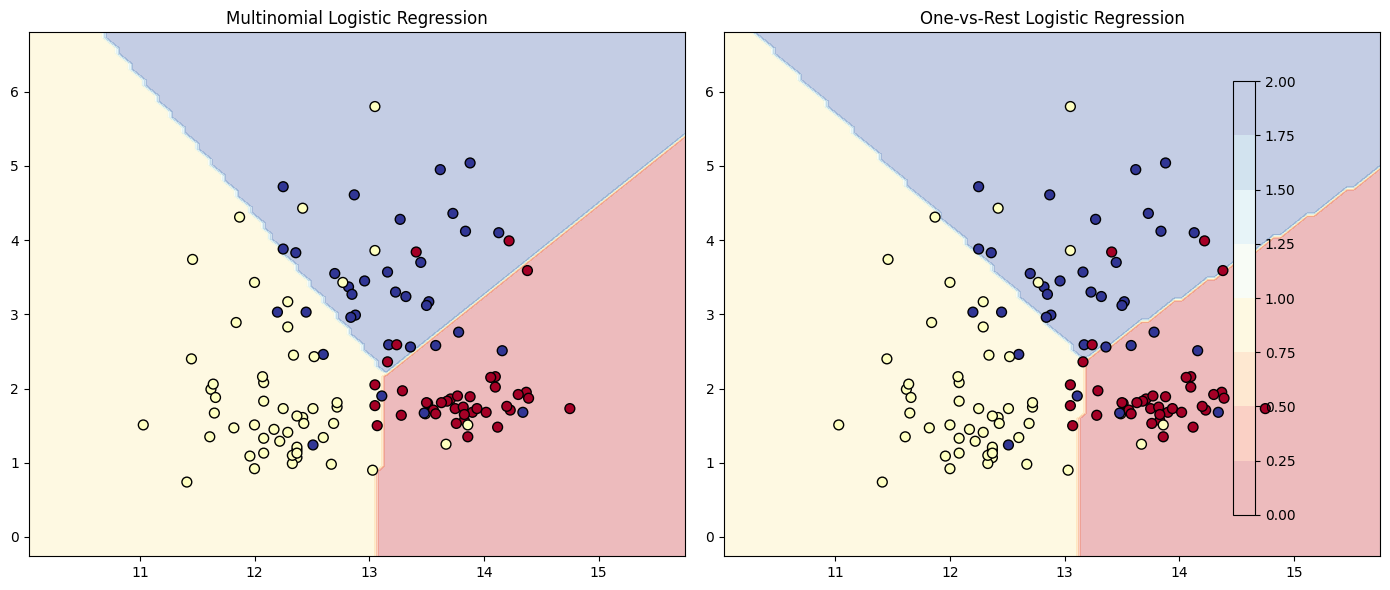

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load the wine dataset
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'], columns=raw['feature_names'])
y = raw['target']

# Use only 'alcohol' and 'malic_acid' for simplicity
X = X_full[['alcohol', 'malic_acid']]

# Split the dataset into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109, shuffle=True)

# Train Multinomial Logistic Regression
logreg_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg_multinomial.fit(X_train, y_train)

# Train One-vs-Rest Logistic Regression
logreg_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
logreg_ovr.fit(X_train, y_train)

# Define a function to plot the decision boundary for a given model
def plot_decision_boundary(model, X, y, ax, title="Decision Boundary"):
    # Create a meshgrid to plot decision boundaries
    x_min, x_max = X['alcohol'].min() - 1, X['alcohol'].max() + 1
    y_min, y_max = X['malic_acid'].min() - 1, X['malic_acid'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour (decision boundary)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    
    # Plot the training points
    scatter = ax.scatter(X['alcohol'], X['malic_acid'], c=y, edgecolors='k', s=50, cmap=plt.cm.RdYlBu)
    ax.set_title(title)
    return scatter

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot decision boundaries for Multinomial Logistic Regression
plot_decision_boundary(logreg_multinomial, X_train, y_train, axes[0], title="Multinomial Logistic Regression")

# Plot decision boundaries for One-vs-Rest Logistic Regression
plot_decision_boundary(logreg_ovr, X_train, y_train, axes[1], title="One-vs-Rest Logistic Regression")

# Add color bar for the training points
fig.colorbar(axes[0].collections[0], ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

plt.tight_layout()
plt.show()


*your answer here*

**Q9**: Fit 3 different knn regression models: for $k = 3, 10, 30$. Visualize the classification boundaries for these 3 models and compare the results.  Which seem to be overfit?

C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhi\AppData\Local\Temp\ipykernel_23760\3643512409.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so resul

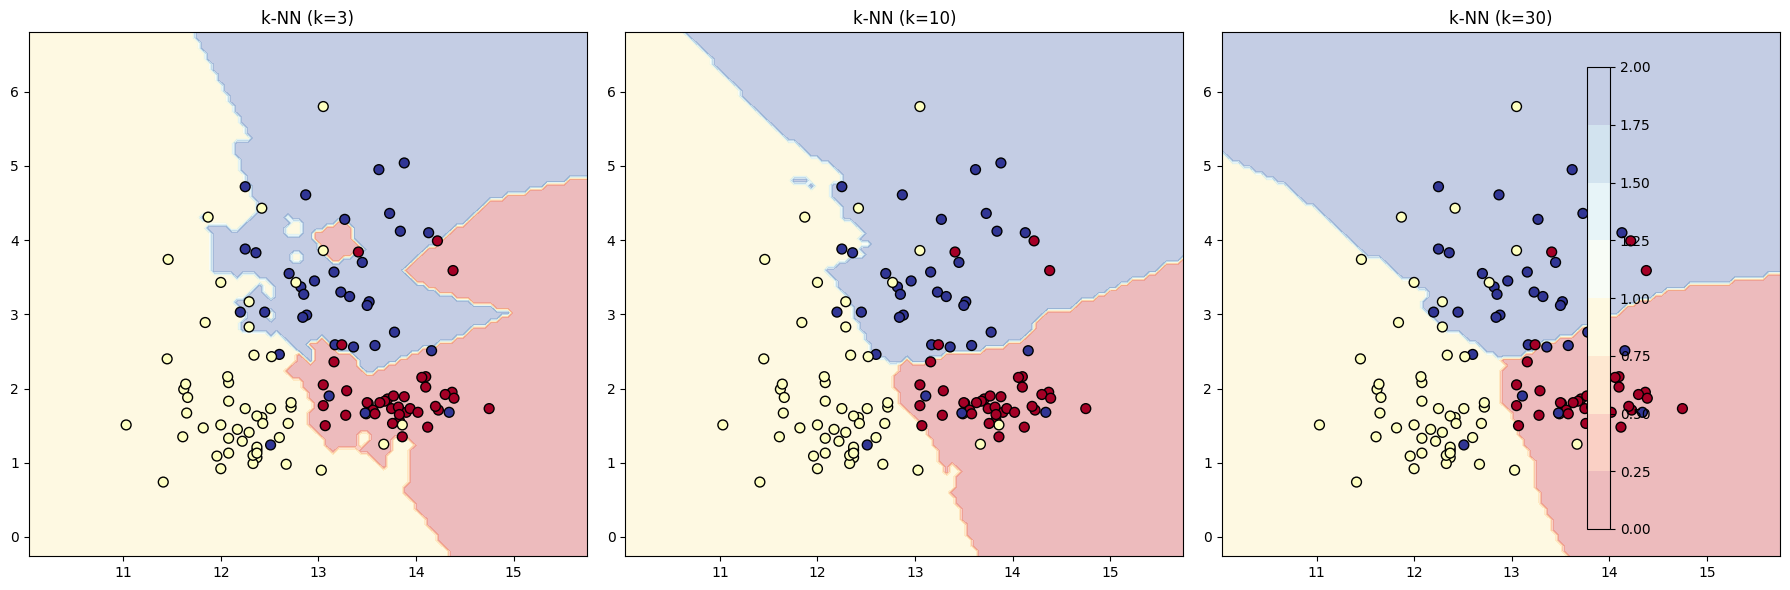

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load the wine dataset
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'], columns=raw['feature_names'])
y = raw['target']

# Use only 'alcohol' and 'malic_acid' for simplicity
X = X_full[['alcohol', 'malic_acid']]

# Split the dataset into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109, shuffle=True)

# Train three different k-NN models for k=3, k=10, and k=30
k_values = [3, 10, 30]
models = {}

for k in k_values:
    models[k] = KNeighborsClassifier(n_neighbors=k)
    models[k].fit(X_train, y_train)

# Define a function to plot the decision boundary for a given model
def plot_decision_boundary(model, X, y, ax, title="Decision Boundary"):
    # Create a meshgrid to plot decision boundaries
    x_min, x_max = X['alcohol'].min() - 1, X['alcohol'].max() + 1
    y_min, y_max = X['malic_acid'].min() - 1, X['malic_acid'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour (decision boundary)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    
    # Plot the training points
    scatter = ax.scatter(X['alcohol'], X['malic_acid'], c=y, edgecolors='k', s=50, cmap=plt.cm.RdYlBu)
    ax.set_title(title)
    return scatter

# Create the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot decision boundaries for each k-NN model
for i, k in enumerate(k_values):
    plot_decision_boundary(models[k], X_train, y_train, axes[i], title=f"k-NN (k={k})")

# Add color bar for the training points
fig.colorbar(axes[0].collections[0], ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

plt.tight_layout()
plt.show()


*your answer here*

**Q10** How could you visualize the classification boundary for any of these models if there was a single predictor?  What if there were more than 2 predictors?

C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


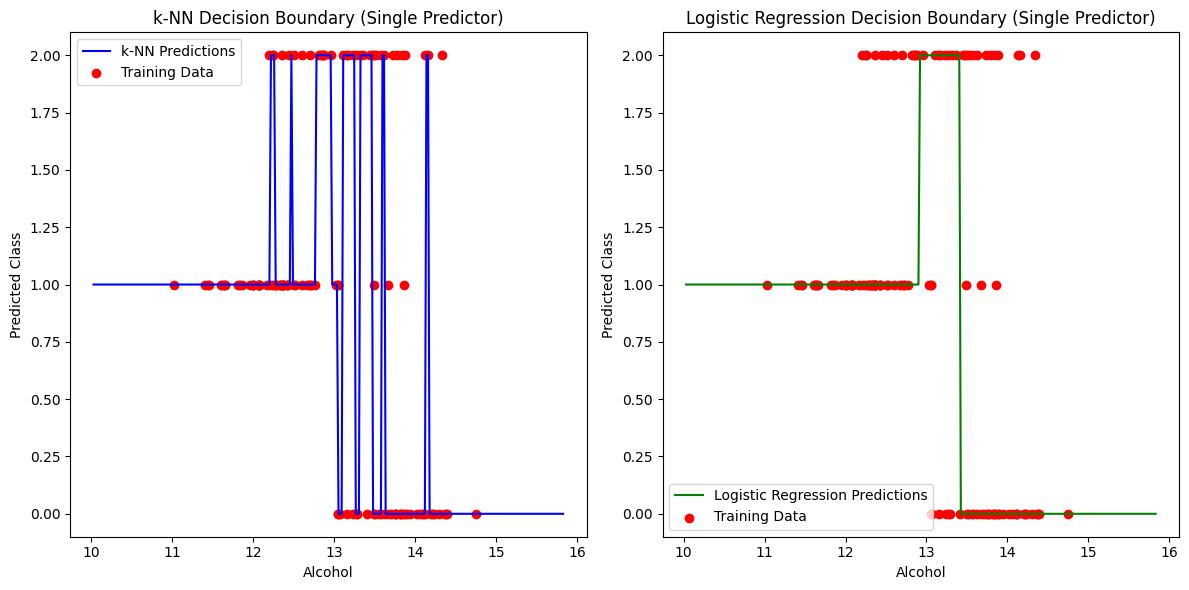

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load wine data
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'], columns=raw['feature_names'])
y = raw['target']

# Use only 'alcohol' for simplicity (1 predictor)
X = X_full[['alcohol']]

# Split the dataset into training and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109, shuffle=True)

# Train k-NN classifier for k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Plot the classification boundary for k-NN
plt.figure(figsize=(12, 6))

# k-NN boundary plot
X_range = np.linspace(X['alcohol'].min() - 1, X['alcohol'].max() + 1, 300).reshape(-1, 1)
y_pred_knn = knn.predict(X_range)

plt.subplot(1, 2, 1)
plt.plot(X_range, y_pred_knn, label='k-NN Predictions', color='blue')
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.title('k-NN Decision Boundary (Single Predictor)')
plt.xlabel('Alcohol')
plt.ylabel('Predicted Class')
plt.legend()

# Logistic Regression boundary plot
y_pred_logreg = logreg.predict(X_range)

plt.subplot(1, 2, 2)
plt.plot(X_range, y_pred_logreg, label='Logistic Regression Predictions', color='green')
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.title('Logistic Regression Decision Boundary (Single Predictor)')
plt.xlabel('Alcohol')
plt.ylabel('Predicted Class')
plt.legend()

plt.tight_layout()
plt.show()


*your answer here*